In [1]:
# Problem Statement
# Convolutional neural network
# Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [2]:
# Basic classification: Classify images of clothing

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.16.1


In [4]:
# Import the Fashion MNIST dataset
# This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. 

# Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" 
# of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) 
# in a format identical to that of the articles of clothing you'll use here.

# This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. 
# Both datasets are relatively small and are used to verify that an algorithm works as expected. T
# hey're good starting points to test and debug code.

# Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the 
# network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. 
# Import and load the Fashion MNIST data directly from TensorFlow:

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
# Loading the dataset returns four NumPy arrays:

# The train_images and train_labels arrays are the training set—the data the model uses to learn.
# The model is tested against the test set, the test_images, and test_labels arrays.
# The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. 
# The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

# Label	Class
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot
# Each image is mapped to a single label. 
# Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# Explore the data
# Let's explore the format of the dataset before training the model. 
# The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
# Likewise, there are 60,000 labels in the training set:
len(train_labels)

60000

In [12]:
# Each label is an integer between 0 and 9:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
# There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:
test_images.shape

(10000, 28, 28)

In [14]:
# And the test set contains 10,000 images labels:
len(test_labels)

10000

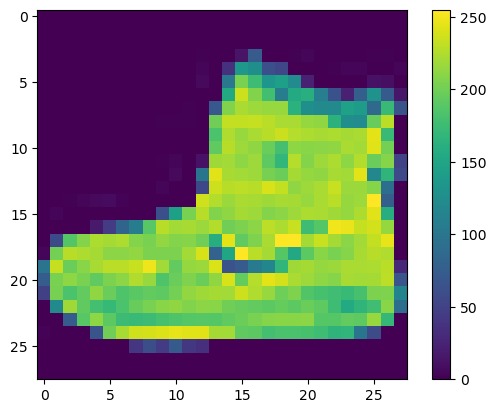

In [15]:
# Preprocess the data
# The data must be preprocessed before training the network. 
# If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model. 
# To do so, divide the values by 255. 
# It's important that the training set and the testing set be preprocessed in the same way:

train_images = train_images / 255.0

test_images = test_images / 255.0

In [17]:
# To verify that the data is in the correct format and that you're ready to build and train the network, 
# let's display the first 25 images from the training set and display the class name below each image.

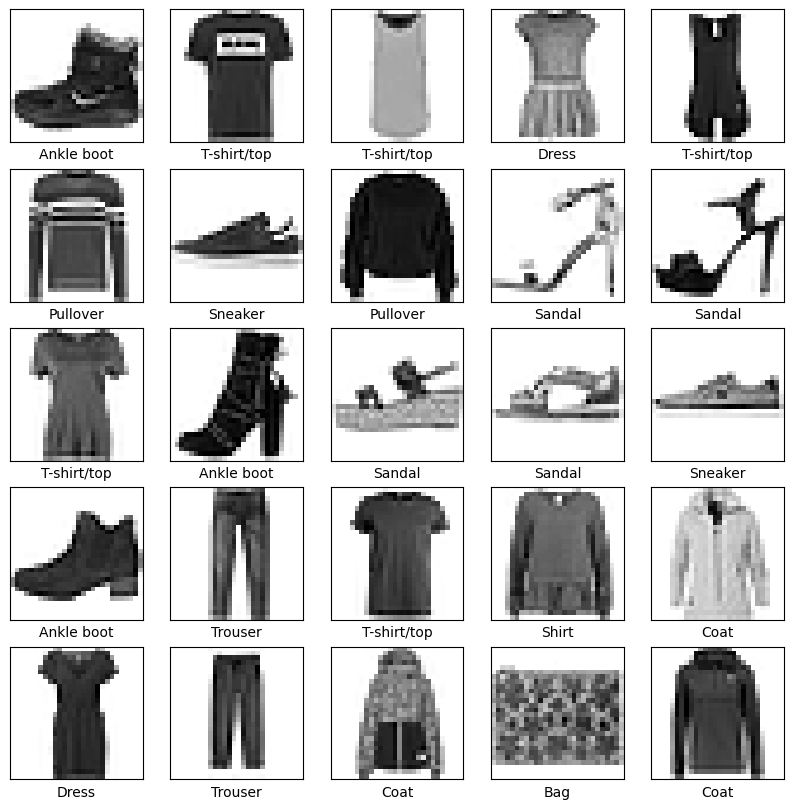

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
# Build the model
# Building the neural network requires configuring the layers of the model, then compiling the model.

# Set up the layers
# The basic building block of a neural network is the layer. 
# Layers extract representations from the data fed into them. 
# Hopefully, these representations are meaningful for the problem at hand.

# Most of deep learning consists of chaining together simple layers. 
# Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [22]:
# The first layer in this network, tf.keras.layers.Flatten, 
# transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) 
# to a one-dimensional array (of 28 * 28 = 784 pixels). 
# Think of this layer as unstacking rows of pixels in the image and lining them up. 
# This layer has no parameters to learn; it only reformats the data.

# After the pixels are flattened, 
# the network consists of a sequence of two tf.keras.layers.Dense layers. 
# These are densely connected, or fully connected, neural layers. 
# The first Dense layer has 128 nodes (or neurons). 
# The second (and last) layer returns a logits array with length of 10. 
# Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [23]:
# Compile the model
# Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
# Train the model
# Training the neural network model requires the following steps:

# 1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
# 2. The model learns to associate images and labels.
# 3. You ask the model to make predictions about a test set—in this example, the test_images array.
# 4. Verify that the predictions match the labels from the test_labels array.

In [26]:
# Feed the model
# To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [27]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7792 - loss: 0.6351
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8650 - loss: 0.3808
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8752 - loss: 0.3428
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8868 - loss: 0.3106
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8927 - loss: 0.2935
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8979 - loss: 0.2782
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9033 - loss: 0.2656
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9040 - loss: 0.2593
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9074 - loss: 0.2475
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9092 - loss: 0.2436
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9138 - loss: 0.2310
Epoch 12/30
1875/1875 ━━━━━━━━

In [28]:
# Evaluate accuracy
# Next, compare how the model performs on the test dataset:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8772 - loss: 0.4377

Test accuracy: 0.8772000074386597


In [29]:
# It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. 
# This gap between training accuracy and test accuracy represents overfitting. 
# Overfitting happens when a machine learning model performs worse on new, 
# previously unseen inputs than it does on the training data. 
# An overfitted model "memorizes" the noise and details in the training dataset to a point where it 
# negatively impacts the performance of the model on the new data. For more information, see the following:

In [30]:
# Make predictions
# With the model trained, you can use it to make predictions about some images. 
# Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [31]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [32]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [33]:
# Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [34]:
predictions[0]

array([2.99282266e-11, 3.38828928e-17, 1.89253062e-12, 1.06466125e-16,
       5.43350460e-14, 1.74980607e-06, 1.95269191e-12, 8.57038889e-03,
       1.08688917e-11, 9.91427839e-01], dtype=float32)

In [35]:
# A prediction is an array of 10 numbers. 
# They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. 
# You can see which label has the highest confidence value:

In [36]:
np.argmax(predictions[0])

9

In [37]:
# So, the model is most confident that this image is an ankle boot, or class_names[9]. 
# Examining the test label shows that this classification is correct:

test_labels[0]

9

In [38]:
# Graph this to look at the full set of 10 class predictions.

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [39]:
# Verify predictions
# With the model trained, you can use it to make predictions about some images.

# Let's look at the 0th image, predictions, and prediction array. 
# Correct prediction labels are blue and incorrect prediction labels are red. 
# The number gives the percentage (out of 100) for the predicted label.

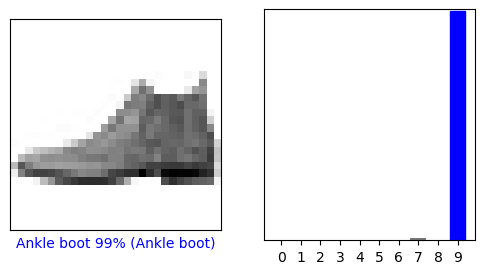

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

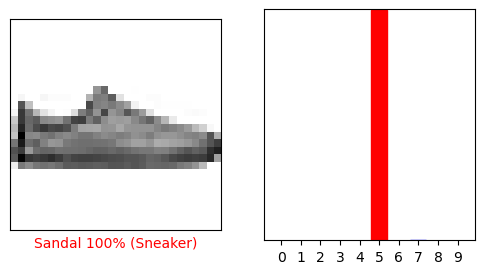

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

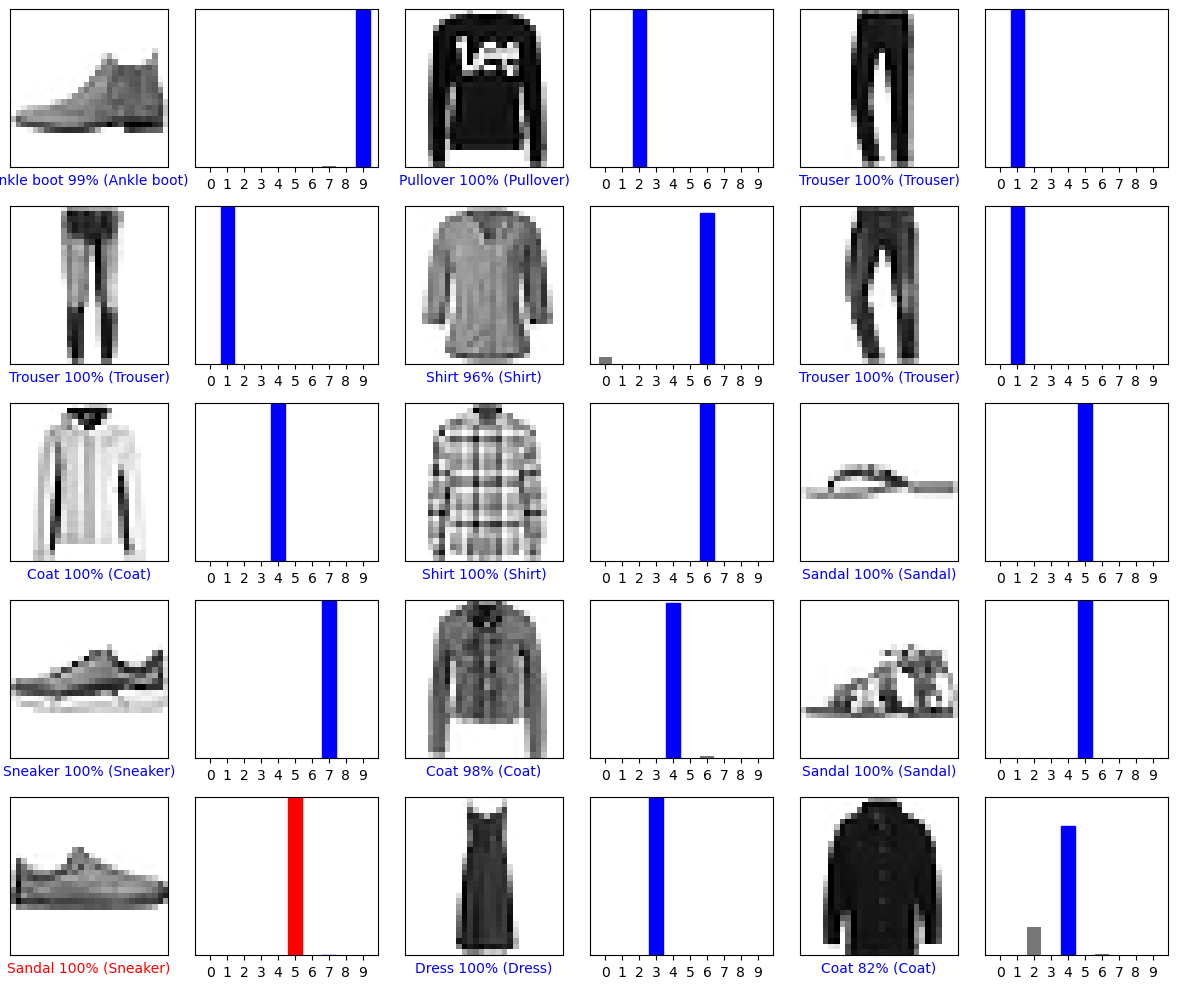

In [42]:
# Let's plot several images with their predictions. Note that the model can be wrong even when very confident.
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [43]:
# Use the trained model
# Finally, use the trained model to make a prediction about a single image.

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [44]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list:

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [45]:
# Now predict the correct label for this image:

predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[2.5907057e-06 1.0244057e-20 9.9598581e-01 2.8492538e-14 3.7752234e-03
  1.0317606e-17 2.3638659e-04 3.5913728e-26 1.9972178e-16 6.9128525e-23]]


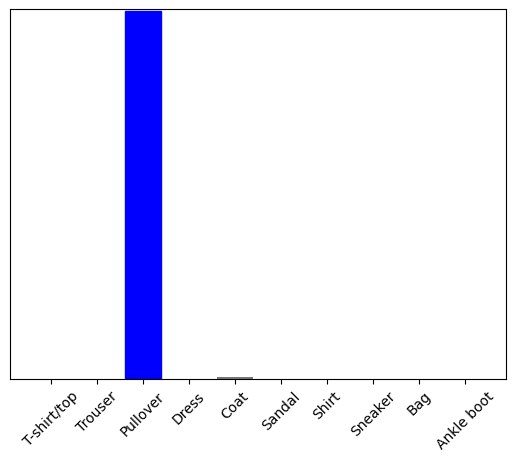

In [46]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [47]:
# tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. 
# Grab the predictions for our (only) image in the batch:

np.argmax(predictions_single[0])

2

In [ ]:
# And the model predicts a label as expected.